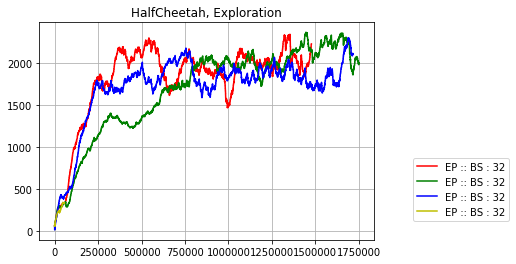

GRAPH1 : EP :: BS : 32
    MAX : 2346.633, EPISODE : 2797        .....100.0%

GRAPH2 : EP :: BS : 32
    MAX : 2371.116, EPISODE : 2546        .....100.0%

GRAPH3 : EP :: BS : 32
    MAX : 2306.376, EPISODE : 2950        .....100.0%

GRAPH4 : EP :: BS : 32
    MAX : 347.369, EPISODE : 346        .....13.3%



In [7]:
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

####################################

EP1 = ['Hopper_E(15)_(32,1,4,1,1,0.0001)', 'EP :: BS : 32']
EP2 = ['Hopper_E(15)_(32,1,4,2,1,0.0001)', 'EP :: BS : 32']
EP3 = ['Hopper_E(15)_(32,1,4,4,1,0.0001)', 'EP :: BS : 32']

EP4 = ['Hopper_E(15)_(32,1,1,1,1,0.0001)', 'EP :: BS : 32']
EP5 = ['Hopper_E(15)_(64,1,1,1,1,0.0001)', 'EP :: BS : 64']

EP6 = ['Hopper_E(15)_(32,1,8,1,1,0.0001)', 'EP :: BS : 32']
EP7 = ['Hopper_E(15)_(32,1,10,1,1,0.0001)', 'EP :: BS : 32']

SO1 = ['Hopper_S(15)_(32,1,4,2,0.2,1,0.0001)', 'SO :: BS : 32, SCALE : 0.2']
SO2 = ['Hopper_S(15)_(32,1,4,2,0.1,1,0.0001)', 'SO :: BS : 32, SCALE : 0.1']

SP1 = ['Hopper_SP(15)_(32,1,4,2,1,1,0.0001)', 'SP :: BS : 32, SCALE : 1']
SP2 = ['Hopper_SP(15)_(32,1,4,2,0.2,1,0.0001)', 'SP :: BS : 32, SCALE : 0.2']
SP3 = ['Hopper_SP(15)_(32,1,4,2,0.1,1,0.0001)', 'SP :: BS : 32, SCALE : 0.1']

####################################

file_name_list = [EP1, EP2, EP3, EP4]
#file_name_list = [SP3, SP4, SP7, SP8]

#file_name_list = [EP6, EP7]
#file_name_list = [EP3, SP11, SP12]

#file_name_list = [SO1, SO2, SP1, SP2]
#file_name_list = [EP1, SO2, SP3, SP4]

graph_color = ['r', 'g', 'b', 'y', 'm', 'c']

####################################
max_list = []
max_epi_list = []
epi_list = []

for i in range(len(file_name_list)):
    step_avg_list = []
    global_step_list = []
    
    with open('/home/jolp/Desktop/Data/'+file_name_list[i][0]+'_seed1', 'rb') as fin1:
        step_avg_list = pickle.load(fin1)
    
    with open('/home/jolp/Desktop/Data/'+file_name_list[i][0]+'_global__seed1', 'rb') as fin2:
        global_step_list = pickle.load(fin2)
    
    step_avg_list = np.array(step_avg_list)
    
    steps = global_step_list[-1]
    step_list = []
    
    step = 0

    for num in range(steps):
        if num == global_step_list[step]:
            step += 1
        step_list.append(step_avg_list[step])
    
    len_file = len(step_avg_list)
    epi_list.append(len_file)
    
    x_values = list(range(1, steps + 1))
    y_values = step_list[:]
    
    max_list.append(np.max(step_avg_list))
    max_epi_list.append(np.argmax(step_avg_list)+1)
    
    plt.plot(x_values, y_values, c=graph_color[i], label=file_name_list[i][1])

    
plt.title('HalfCheetah, Exploration')
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.1, 0.4))
plt.show()

for i in range(len(file_name_list)):
    print('GRAPH{} : {}'.format(i+1,file_name_list[i][1]))
    print('    MAX : {}, EPISODE : {}        .....{}%'.format(round(max_list[i],3),max_epi_list[i],round(epi_list[i]/30.,1)))
    print('')
